In [ ]:
# imports
import pandas as pd
import csv
import numpy as np
import nltk

In [ ]:
# read in the data
data = pd.read_csv('complaints-2020-02-25_21_03.csv')
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,12/06/19,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Don't agree with the fees charged,Have been trying to figure out how my loan pay...,None,AES/PHEAA,NY,None,Servicemember,Consent provided,Web,12/06/19,Closed with explanation,Yes,NaN,3460785
1,02/07/20,Student loan,Private student loan,Struggling to repay your loan,Problem lowering your monthly payments,Student Loan reunion corporation has very high...,Company believes it acted appropriately as aut...,Student Loan Finance Corporation,MN,554XX,None,Consent provided,Web,02/07/20,Closed with explanation,Yes,NaN,3523489
2,02/06/20,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying ...,We have reached out to sallie Mae to lower and...,Company believes it acted appropriately as aut...,SLM CORPORATION,NY,103XX,None,Consent provided,Web,02/06/20,Closed with explanation,Yes,NaN,3523204
3,10/21/19,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,I have consolidated direct federal loans with ...,None,AES/PHEAA,NY,109XX,None,Consent provided,Web,10/21/19,Closed with non-monetary relief,Yes,NaN,3412962
4,02/07/20,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying ...,currently the interest is too high on my loan ...,Company believes it acted appropriately as aut...,SLM CORPORATION,CA,900XX,None,Consent provided,Web,02/13/20,Closed with explanation,Yes,NaN,3524014


In [ ]:
data['Date received'].min()

'01/01/16'

In [ ]:
data['Date received'].max()

'12/31/19'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25195 entries, 0 to 25194
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 25195 non-null  object
 1   Product                       25195 non-null  object
 2   Sub-product                   25195 non-null  object
 3   Issue                         25195 non-null  object
 4   Sub-issue                     25195 non-null  object
 5   Consumer complaint narrative  25195 non-null  object
 6   Company public response       25195 non-null  object
 7   Company                       25195 non-null  object
 8   State                         25195 non-null  object
 9   ZIP code                      25195 non-null  object
 10  Tags                          25195 non-null  object
 11  Consumer consent provided?    25195 non-null  object
 12  Submitted via                 25195 non-null  object
 13  Date sent to com

In [ ]:
'''
Get a list of Sub-Products and split data by them
'''

'\nGet a list of Sub-Products and split data by them\n'

In [ ]:
# sort the dataframe by Sub-product
data = data.sort_values(by=['Sub-product'])
# set the index to be this and don't drop
data = data.set_index([['Sub-product']*len(data)])
# get a list of different Sub-products
sub_products = data['Sub-product'].unique().tolist()

sub_products

['Federal student loan servicing',
 'Non-federal student loan',
 'Private student loan']

In [ ]:
# split the data based on sub_products
federal_student_loan_data = data.loc[data['Sub-product'] =='Federal student loan servicing']
non_federal_student_loan_data = data.loc[data['Sub-product'] =='Non-federal student loan']
private_student_loan = data.loc[data['Sub-product'] == 'Private student loan']

In [ ]:
# Add each new dataframe to a csv file

# federal_student_loan_data.to_csv(r'20200228_federal_student_loan_data.csv', index=False)
# non_federal_student_loan_data.to_csv(r'20200228_non_federal_student_loan_data.csv', index=False)
# private_student_loan.to_csv(r'20200228_private_student_loan_data.csv', index=False)

In [ ]:
'''
Get a list of total issues
'''

'\nGet a list of total issues\n'

In [ ]:
# sort the dataframe by Issue
data = data.sort_values(by=['Issue'])
# set the index to be this and don't drop
data = data.set_index([['Issue']*len(data)])
# get a list of different Issues
issues = data['Issue'].unique().tolist()

issues

["Can't repay my loan",
 'Credit monitoring or identity theft protection services',
 'Dealing with my lender or servicer',
 'Dealing with your lender or servicer',
 'Getting a loan',
 'Improper use of your report',
 'Incorrect information on your report',
 "Problem with a credit reporting company's investigation into an existing problem",
 'Problem with fraud alerts or security freezes',
 'Struggling to repay your loan',
 'Unable to get your credit report or credit score']

In [ ]:
# Write a text file list of all issues

# with open('list_of_issues.txt', 'w') as file:
#     for item in issues:
#         file.write("%s\n" % item)

In [ ]:
len(issues)

11

In [ ]:
'''
Get a list of total sub-issues
'''

'\nGet a list of total sub-issues\n'

In [ ]:
# sort the dataframe by Sub-issue
data = data.sort_values(by=['Sub-issue'])
# set the Sub-issue to be this and don't drop
data = data.set_index([['Sub-issue']*len(data)])
# get a list of different Sub-issue
sub_issues = data['Sub-issue'].unique().tolist()


In [ ]:
# Write a text file list of all sub issues

# with open('list_of_sub_issues.txt', 'w') as file:
#     for item in sub_issues:
#         file.write("%s\n" % line)

In [ ]:
len(sub_issues)

48

In [ ]:
'''
Seperate data by issue
'''

'\nSeperate data by issue\n'

In [ ]:
#federal_student_loan_data = data.loc[data['Sub-product'] =='Federal student loan servicing']

cant_repay_loan_data = data.loc[data['Issue'] == 'Can\'t repay my loan']
credit_monitoring_data = data.loc[data['Issue'] == 'Credit monitoring or identity theft protection services']
dealing_with_my_lender_data = data.loc[data['Issue'] == 'Dealing with my lender or servicer']
dealing_with_your_lender_data = data.loc[data['Issue'] == 'Dealing with your lender or servicer']
getting_loan_data = data.loc[data['Issue'] == 'Getting a loan']
improper_use_of_report_data = data.loc[data['Issue'] == 'Improper use of your report']
incorrect_information_data = data.loc[data['Issue'] == 'Incorrect information on your report']
credit_reporting_company_investigation_data = data.loc[data['Issue'] == 'Problem with a credit reporting company\'s investigation into an existing problem']
fraud_alert_issues_data = data.loc[data['Issue'] == 'Problem with fraud alerts or security freezes']
loan_repayment_issues_data = data.loc[data['Issue'] == 'Struggle to repay your loan']
credit_score_issue_data = data.loc[data['Issue'] == 'Unable to get your credit report or credit score']

In [ ]:
credit_monitoring_data['Sub-issue'].unique()

array(['Billing dispute for services',
       "Didn't receive services that were advertised",
       'Problem with product or service terms changing',
       'Received unwanted marketing or advertising'], dtype=object)

In [ ]:
'''
Plot data
'''

'\nPlot data\n'

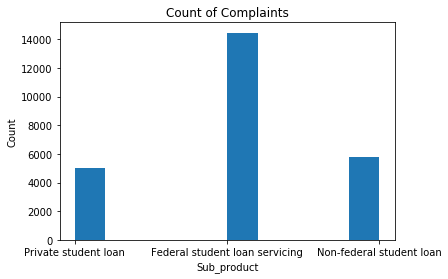

Number of Private Student Loans: 4987
Number of Federal Student Loan Complaints: 14455
Number of Non Federal Student Loans: 5753


In [ ]:
# import data visualization libarary
import matplotlib.pyplot as plt

# Display graph showing count of complaints for each Sub-product
fig, ax = plt.subplots()
ax.hist(data['Sub-product'])
ax.set_title('Count of Complaints')
ax.set_xlabel('Sub_product')
ax.set_ylabel('Count')
plt.show()

# Print count of each Sub-product
print("Number of Private Student Loans:", len(private_student_loan))
print("Number of Federal Student Loan Complaints:", len(federal_student_loan_data))
print("Number of Non Federal Student Loans:", len(non_federal_student_loan_data))

In [ ]:
data = data.sort_values(by=['Company'])
data = data.set_index([['Company']*len(data)])
companies = data['Company'].unique().tolist()

In [ ]:
#write all company names to csv
        
# with open('all_companies.txt','w') as file:
#     for item in sub_issues:
#         file.write("%s\n" % item)

In [ ]:
# list federal student loan companies and put it into list.txt

federal_student_loan_data = federal_student_loan_data.sort_values(by=['Company'])
federal_student_loan_data = federal_student_loan_data.set_index([['Company']*len(federal_student_loan_data)])
federal_student_loan_companies = federal_student_loan_data['Company'].unique().tolist()

# with open('federal_student_loan_companies.txt','w') as file:
#     for item in federal_student_loan_companies:
#         file.write("%s\n"%item)

In [ ]:
len(federal_student_loan_companies)

202

In [ ]:
# list non federal student loan companies and put it into list.txt

non_federal_student_loan_data = non_federal_student_loan_data.sort_values(by=['Company'])
non_federal_student_loan_data = non_federal_student_loan_data.set_index([['Company'] * len(non_federal_student_loan_data)])
non_federal_student_loan_companies = non_federal_student_loan_data['Company'].unique().tolist()

# with open('non_federal_student_loan_companies.txt','w') as file:
#     for line in non_federal_student_loan_companies:
#         file.write("%s\n"%line)

In [ ]:
len(non_federal_student_loan_companies)

182

In [ ]:
# private_student_loan companies
# List private student loan companies and put it into list.txt

private_student_loan = private_student_loan.sort_values(by=['Company'])
private_student_loan = private_student_loan.set_index([['Company'] * len(private_student_loan)])
private_student_loan_companies = private_student_loan['Company'].unique().tolist()

# with open('private_student_loan_companies.txt','w') as file:
#     for item in private_student_loan_companies:
#         file.write("%s\n"%item)

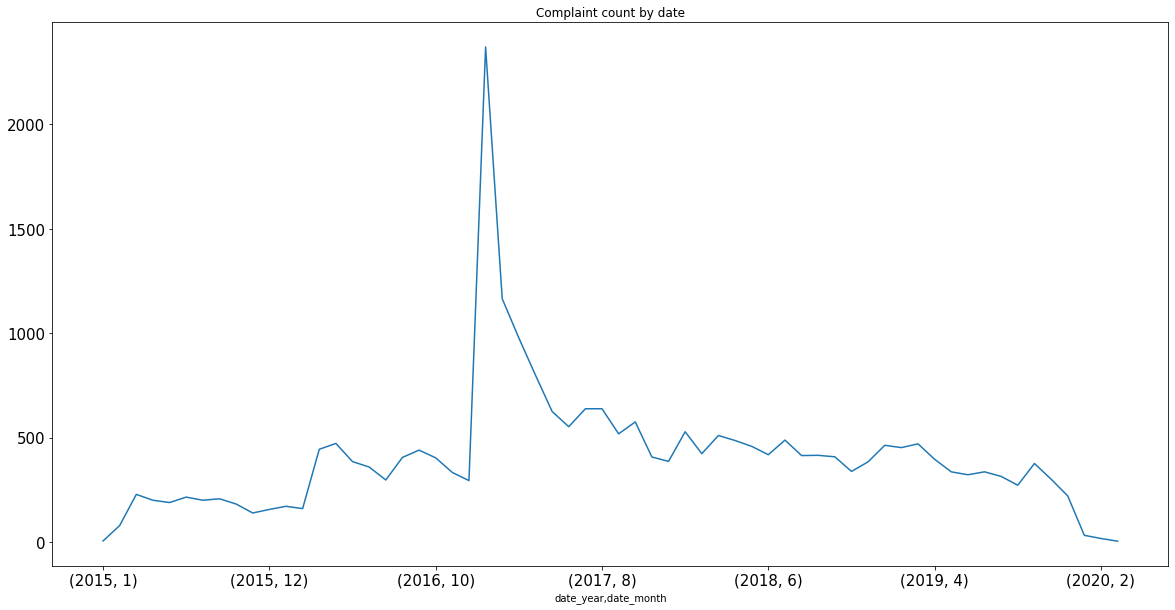

In [ ]:
import random
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta
from dateutil import rrule

# copy the date so we don't mess witht he original dataset
calendar_data = data

# add columns for month and year of the date
calendar_data['Date sent to company'] = pd.to_datetime(calendar_data['Date sent to company'])
calendar_data['date_week'] = calendar_data['Date sent to company'].apply(lambda x: x.isocalendar()[1])
calendar_data['date_month'] = pd.DatetimeIndex(calendar_data['Date sent to company']).month
calendar_data['date_year'] = calendar_data['Date sent to company'].apply(lambda x: x.isocalendar()[0])

week_groups = calendar_data.groupby([calendar_data['date_year'], calendar_data['date_month']])['Company'].count()
week_groups.plot(kind='line',
                figsize=(20,10),
                title="Complaint count by date",
                fontsize=15)

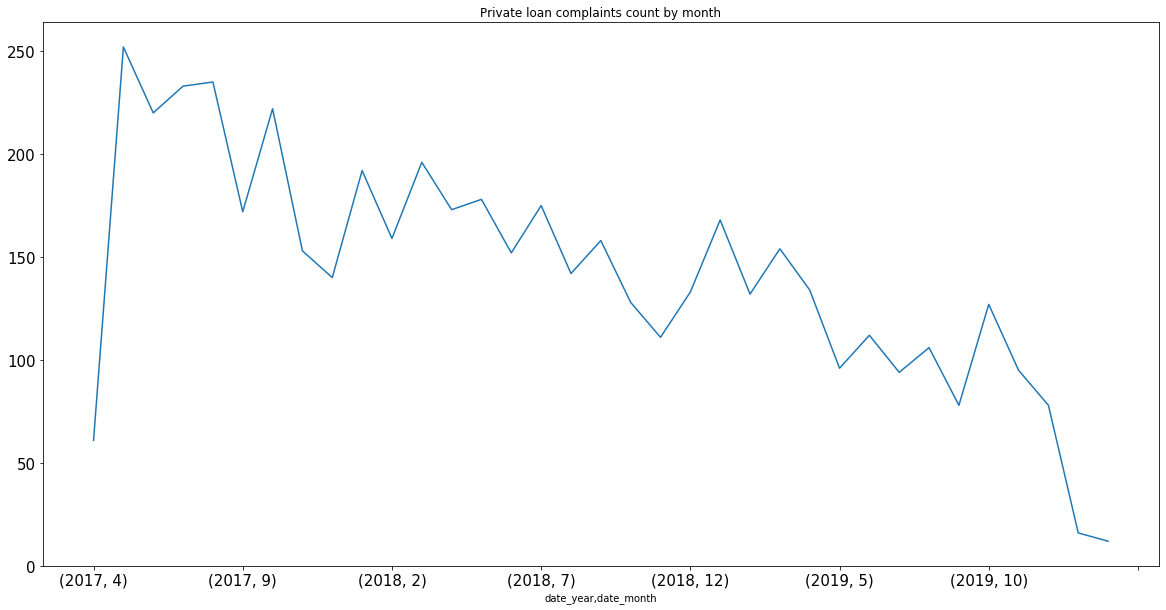

In [ ]:
calendar_federal_data = federal_student_loan_data
calendar_non_federal_data = non_federal_student_loan_data
calendar_private_data = private_student_loan

calendar_private_data['Date sent to company'] = pd.to_datetime(calendar_private_data['Date sent to company'])
calendar_private_data['date_week'] = calendar_private_data['Date sent to company'].apply(lambda x: x.isocalendar()[1])
calendar_private_data['date_month'] = pd.DatetimeIndex(calendar_private_data['Date sent to company']).month
calendar_private_data['date_year'] = calendar_private_data['Date sent to company'].apply(lambda x: x.isocalendar()[0])

month_calendar_private_data = calendar_private_data.groupby([calendar_private_data['date_year'], calendar_private_data['date_month']])['Company'].count()
month_calendar_private_data.plot(kind='line', figsize=(20,10), title='Private loan complaints count by month', fontsize=15)

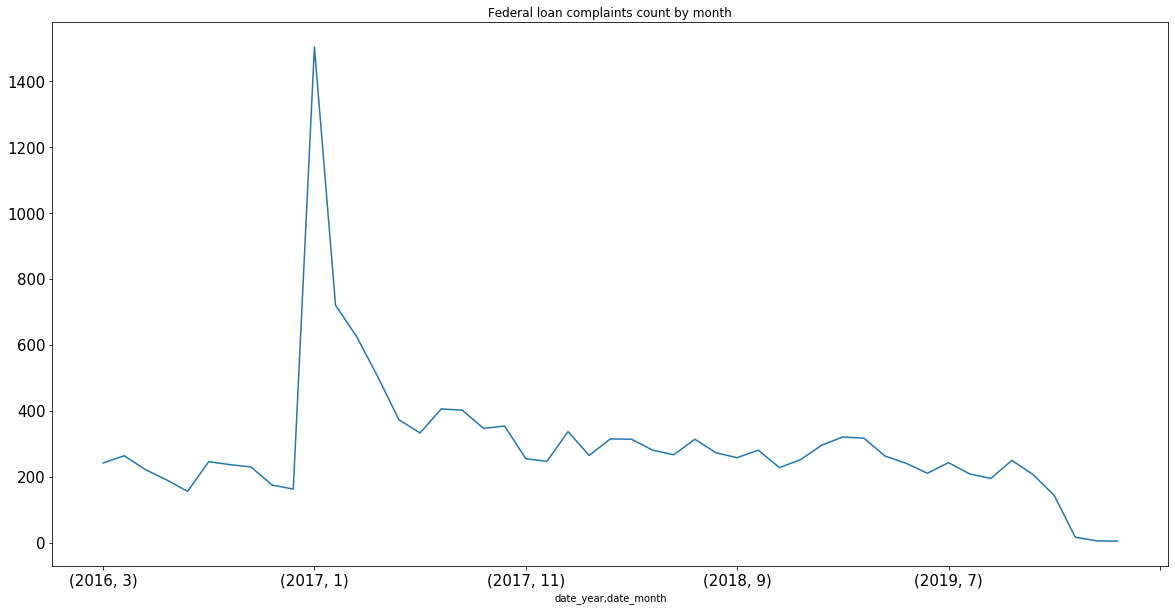

In [ ]:
calendar_federal_data['Date sent to company'] = pd.to_datetime(calendar_federal_data['Date sent to company'])
calendar_federal_data['date_week'] = calendar_federal_data['Date sent to company'].apply(lambda x: x.isocalendar()[1])
calendar_federal_data['date_month'] = pd.DatetimeIndex(calendar_federal_data['Date sent to company']).month
calendar_federal_data['date_year'] = calendar_federal_data['Date sent to company'].apply(lambda x: x.isocalendar()[0])

month_calendar_federal_data = calendar_federal_data.groupby([calendar_federal_data['date_year'], calendar_federal_data['date_month']])['Company'].count()
month_calendar_federal_data.plot(kind='line', figsize=(20,10), title='Federal loan complaints count by month', fontsize=15)

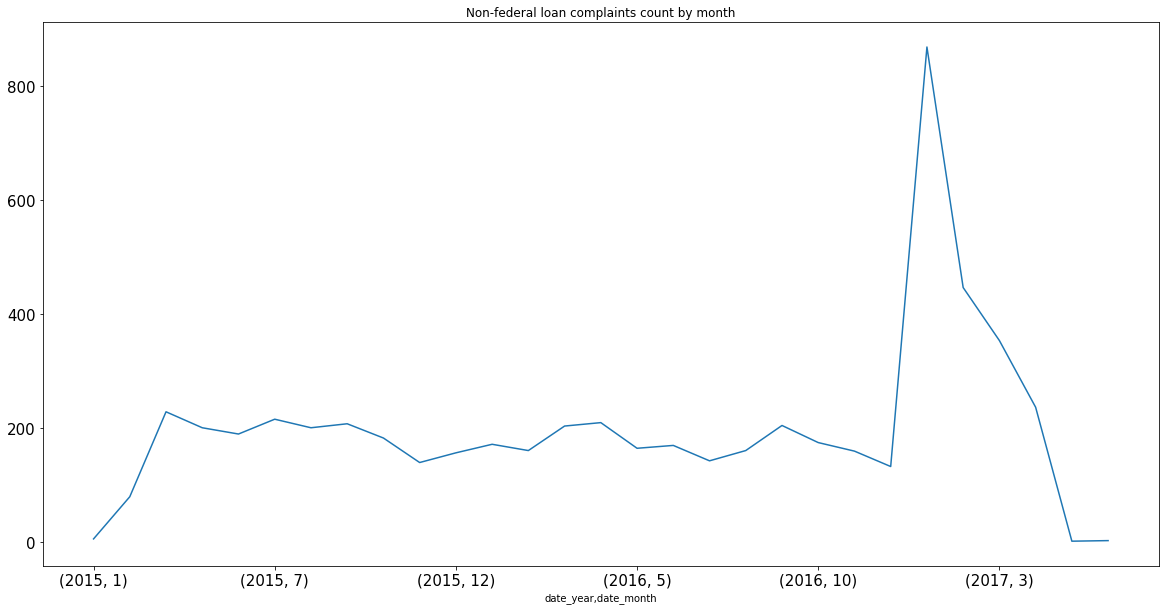

In [ ]:
calendar_non_federal_data['Date sent to company'] = pd.to_datetime(calendar_non_federal_data['Date sent to company'])
calendar_non_federal_data['date_week'] = calendar_non_federal_data['Date sent to company'].apply(lambda x: x.isocalendar()[1])
calendar_non_federal_data['date_month'] = pd.DatetimeIndex(calendar_non_federal_data['Date sent to company']).month
calendar_non_federal_data['date_year'] = calendar_non_federal_data['Date sent to company'].apply(lambda x: x.isocalendar()[0])

month_calendar_non_federal_data = calendar_non_federal_data.groupby([calendar_non_federal_data['date_year'], calendar_non_federal_data['date_month']])['Company'].count()
month_calendar_non_federal_data.plot(kind='line', figsize=(20,10), title='Non-federal loan complaints count by month', fontsize=15)

In [ ]:
table_data = data[['Issue', 'Company']].groupby(['Issue'])['Company'].size().reset_index(name='count')
# table_data.to_excel("Issues_count.xlsx")
print(table_data)

                                                Issue  count
0                                 Can't repay my loan   3057
1   Credit monitoring or identity theft protection...     39
2                  Dealing with my lender or servicer   7909
3                Dealing with your lender or servicer   9348
4                                      Getting a loan    467
5                         Improper use of your report     21
6                Incorrect information on your report    539
7   Problem with a credit reporting company's inve...    238
8       Problem with fraud alerts or security freezes      8
9                       Struggling to repay your loan   3562
10   Unable to get your credit report or credit score      7


In [ ]:
federal_table_data = federal_student_loan_data[['Issue', 'Company']].groupby(['Issue'])['Company'].size().reset_index(name='count')
non_federal_table_data = non_federal_student_loan_data[['Issue', 'Company']].groupby(['Issue'])['Company'].size().reset_index(name='count')
private_table_data = private_student_loan[['Issue', 'Company']].groupby(['Issue'])['Company'].size().reset_index(name='count')

# federal_table_data.to_excel("federal_issues_count.xlsx")
# non_federal_table_data.to_excel("non_federal_issues_count.xlsx")
# private_table_data.to_excel("private_issues_count.xlsx")

In [ ]:
company_complaints = data[['Company','Issue']].groupby(['Company'])['Issue'].size().reset_index(name='Complaint_count').sort_values(by=['Complaint_count'], ascending=False)
# company_complaints.to_excel("count_complaints_per_company.xlsx")

In [ ]:
navient_company_complaints = data.loc[data['Company'] == 'Navient Solutions, LLC.']
print(navient_company_complaints.head())

        Date received       Product                     Sub-product  \
Company      10/12/15  Student loan        Non-federal student loan   
Company      06/23/17  Student loan  Federal student loan servicing   
Company      06/20/17  Student loan            Private student loan   
Company      05/23/17  Student loan            Private student loan   
Company      06/23/15  Student loan        Non-federal student loan   

                                        Issue  \
Company                   Can't repay my loan   
Company  Dealing with your lender or servicer   
Company  Dealing with your lender or servicer   
Company         Struggling to repay your loan   
Company                   Can't repay my loan   

                                                 Sub-issue  \
Company                 Can't get flexible payment options   
Company           Received bad information about your loan   
Company           Received bad information about your loan   
Company  Can't get other flexi

C:\Users\danrl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\danrl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\danrl\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

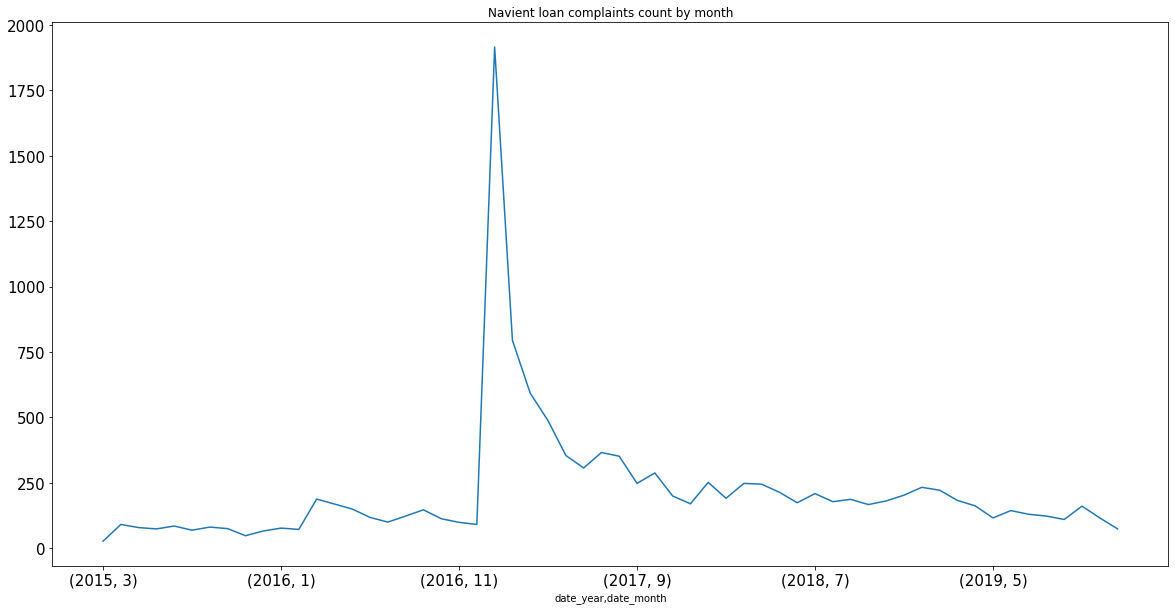

In [ ]:
calendar_navient_company_complaints = navient_company_complaints

calendar_navient_company_complaints['Date sent to company'] = pd.to_datetime(calendar_navient_company_complaints['Date sent to company'])
calendar_navient_company_complaints['date_week'] = calendar_navient_company_complaints['Date sent to company'].apply(lambda x: x.isocalendar()[1])
calendar_navient_company_complaints['date_month'] = pd.DatetimeIndex(calendar_navient_company_complaints['Date sent to company']).month
calendar_navient_company_complaints['date_year'] = pd.DatetimeIndex(calendar_navient_company_complaints['Date sent to company']).year

month_navient_company_complaints = calendar_navient_company_complaints.groupby([calendar_navient_company_complaints['date_year'], calendar_navient_company_complaints['date_month']])['Company'].count()
month_navient_company_complaints.plot(kind='line', figsize=(20,10), title='Navient loan complaints count by month', fontsize=15)


In [ ]:
table_navient = navient_company_complaints[['Issue', 'Company']].groupby(['Issue'])['Company'].size().reset_index(name='count')
# table_navient.to_excel("Navient_issues_count.xlsx")
print(table_navient)

                                                Issue  count
0                                 Can't repay my loan   1894
1   Credit monitoring or identity theft protection...     13
2                  Dealing with my lender or servicer   3879
3                Dealing with your lender or servicer   3984
4                                      Getting a loan    156
5                         Improper use of your report      4
6                Incorrect information on your report    212
7   Problem with a credit reporting company's inve...     65
8       Problem with fraud alerts or security freezes      4
9                       Struggling to repay your loan   2172
10   Unable to get your credit report or credit score      3


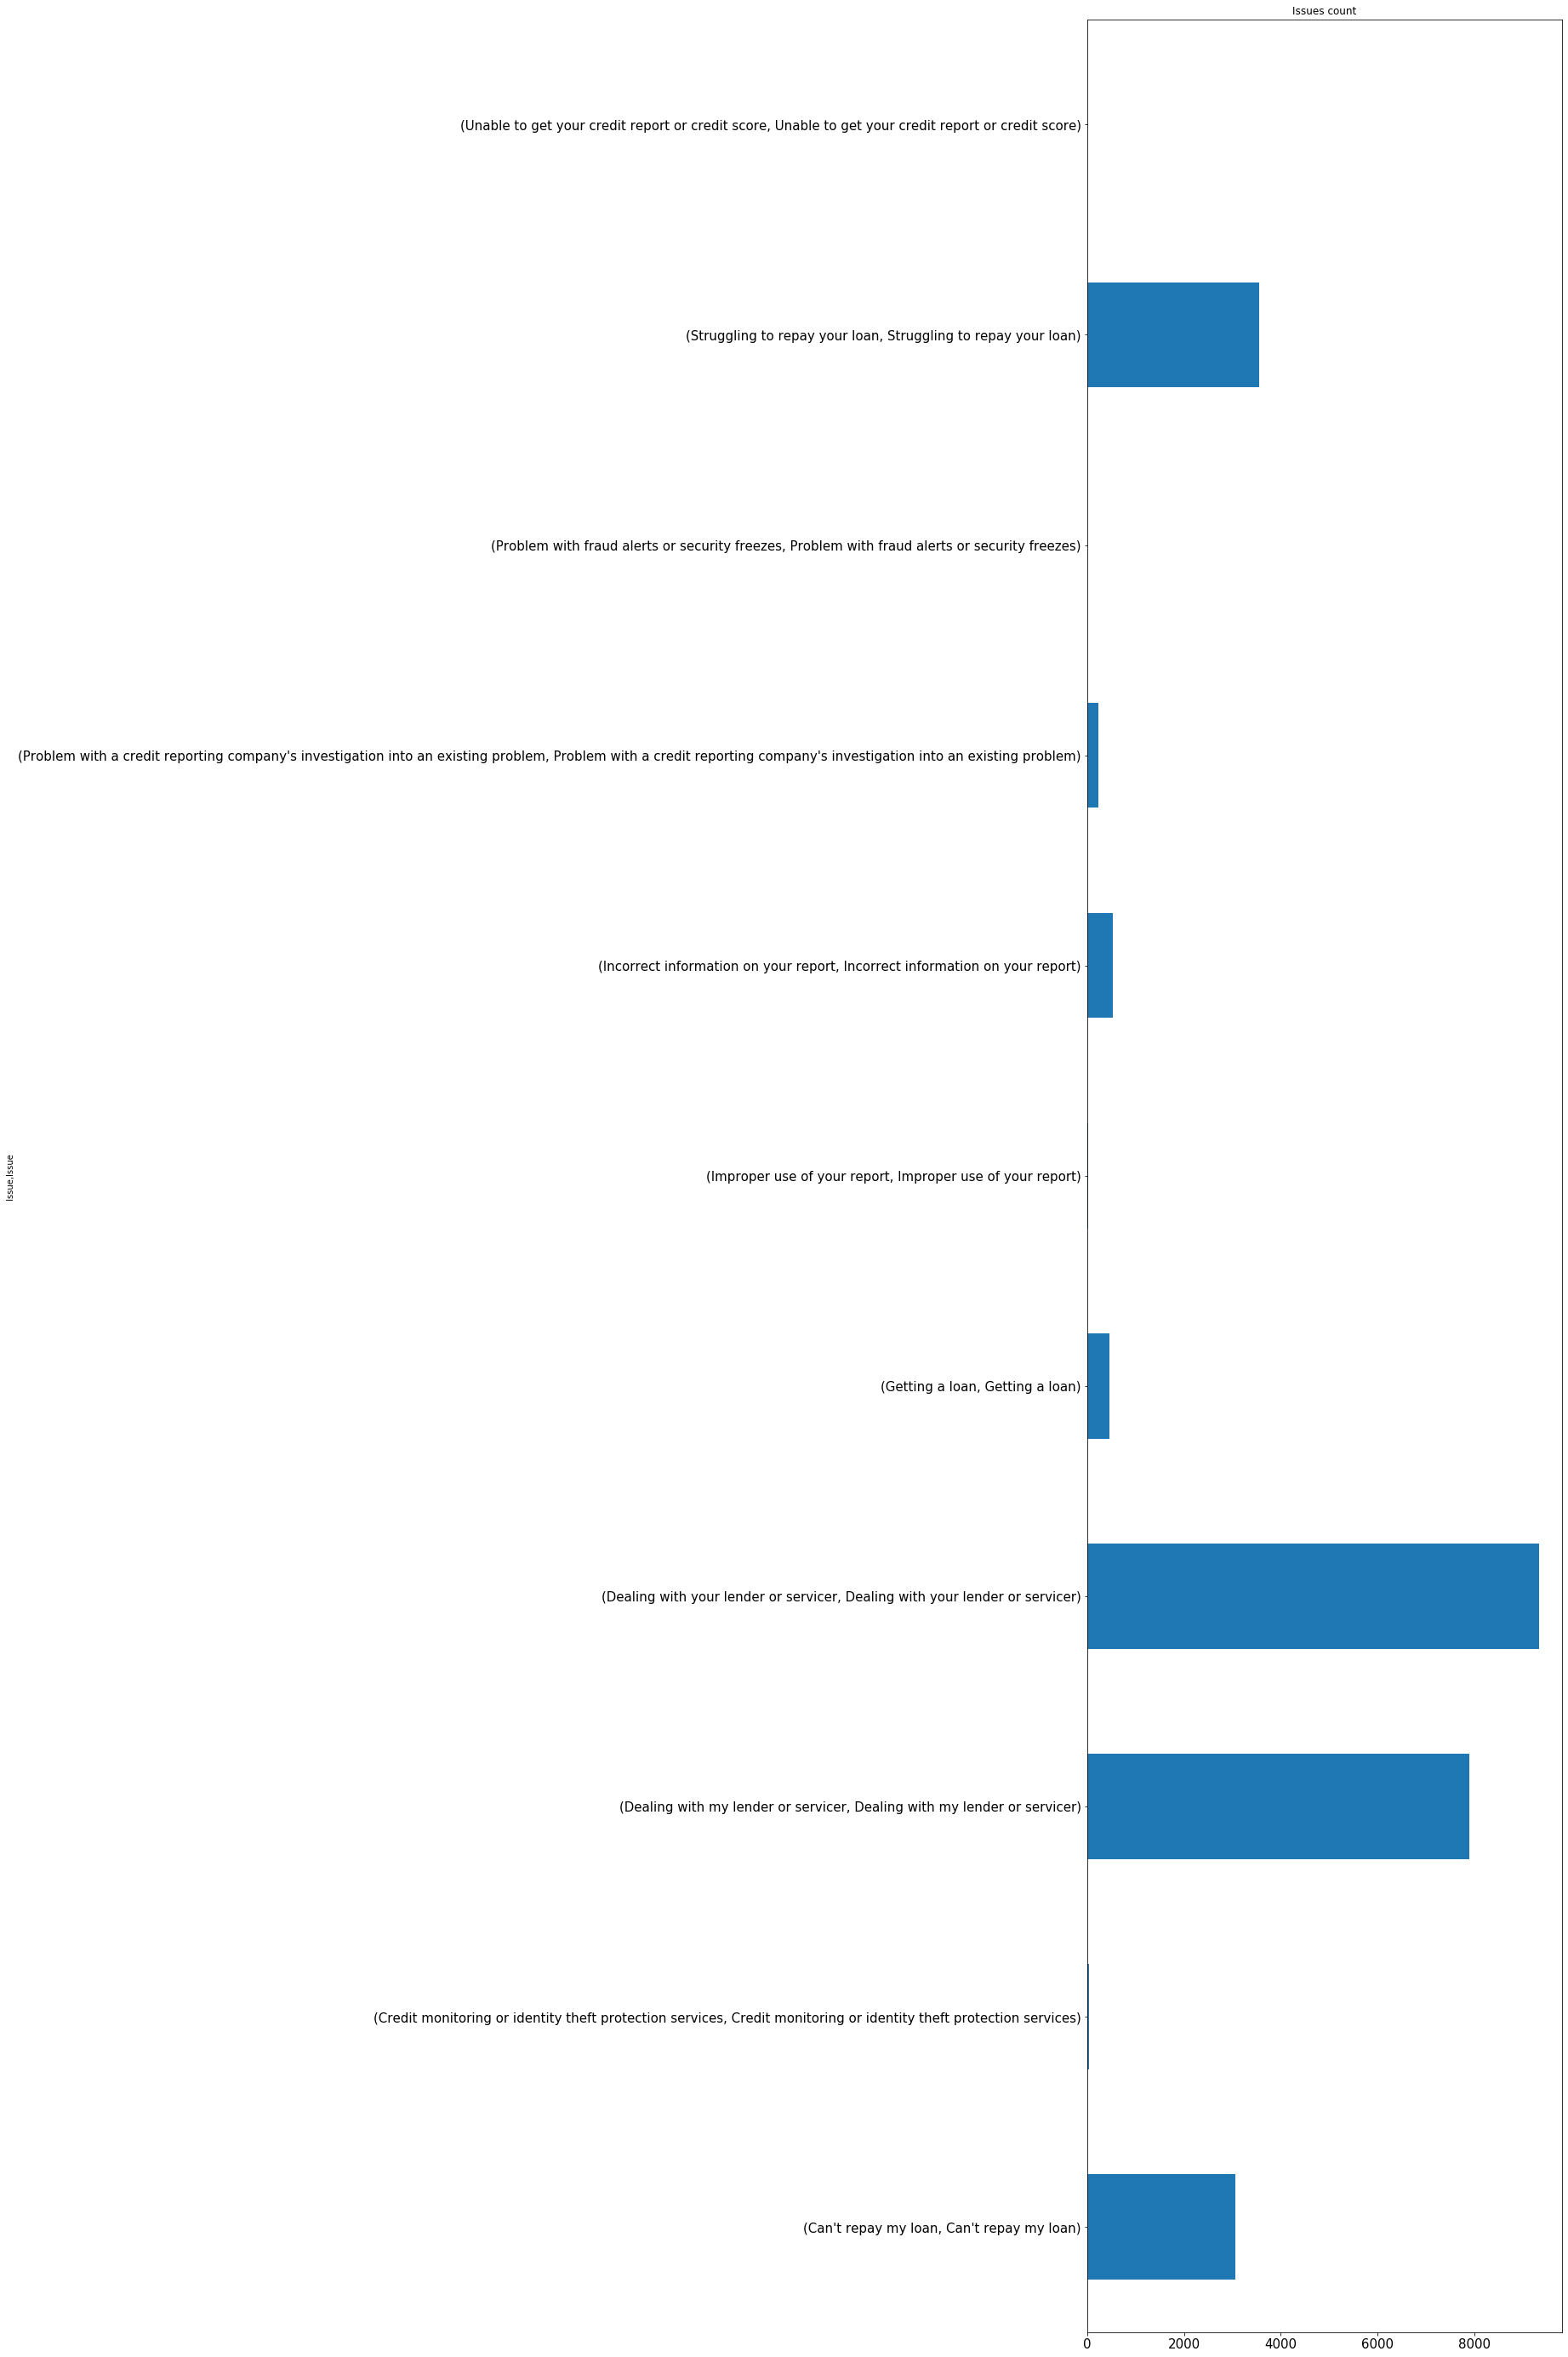

In [ ]:
issue_data = data.groupby([data['Issue'], data['Issue']])['Company'].count()
issue_data.plot(kind='barh',
               title="Issues count",
               fontsize=15,
               figsize=(10,50))

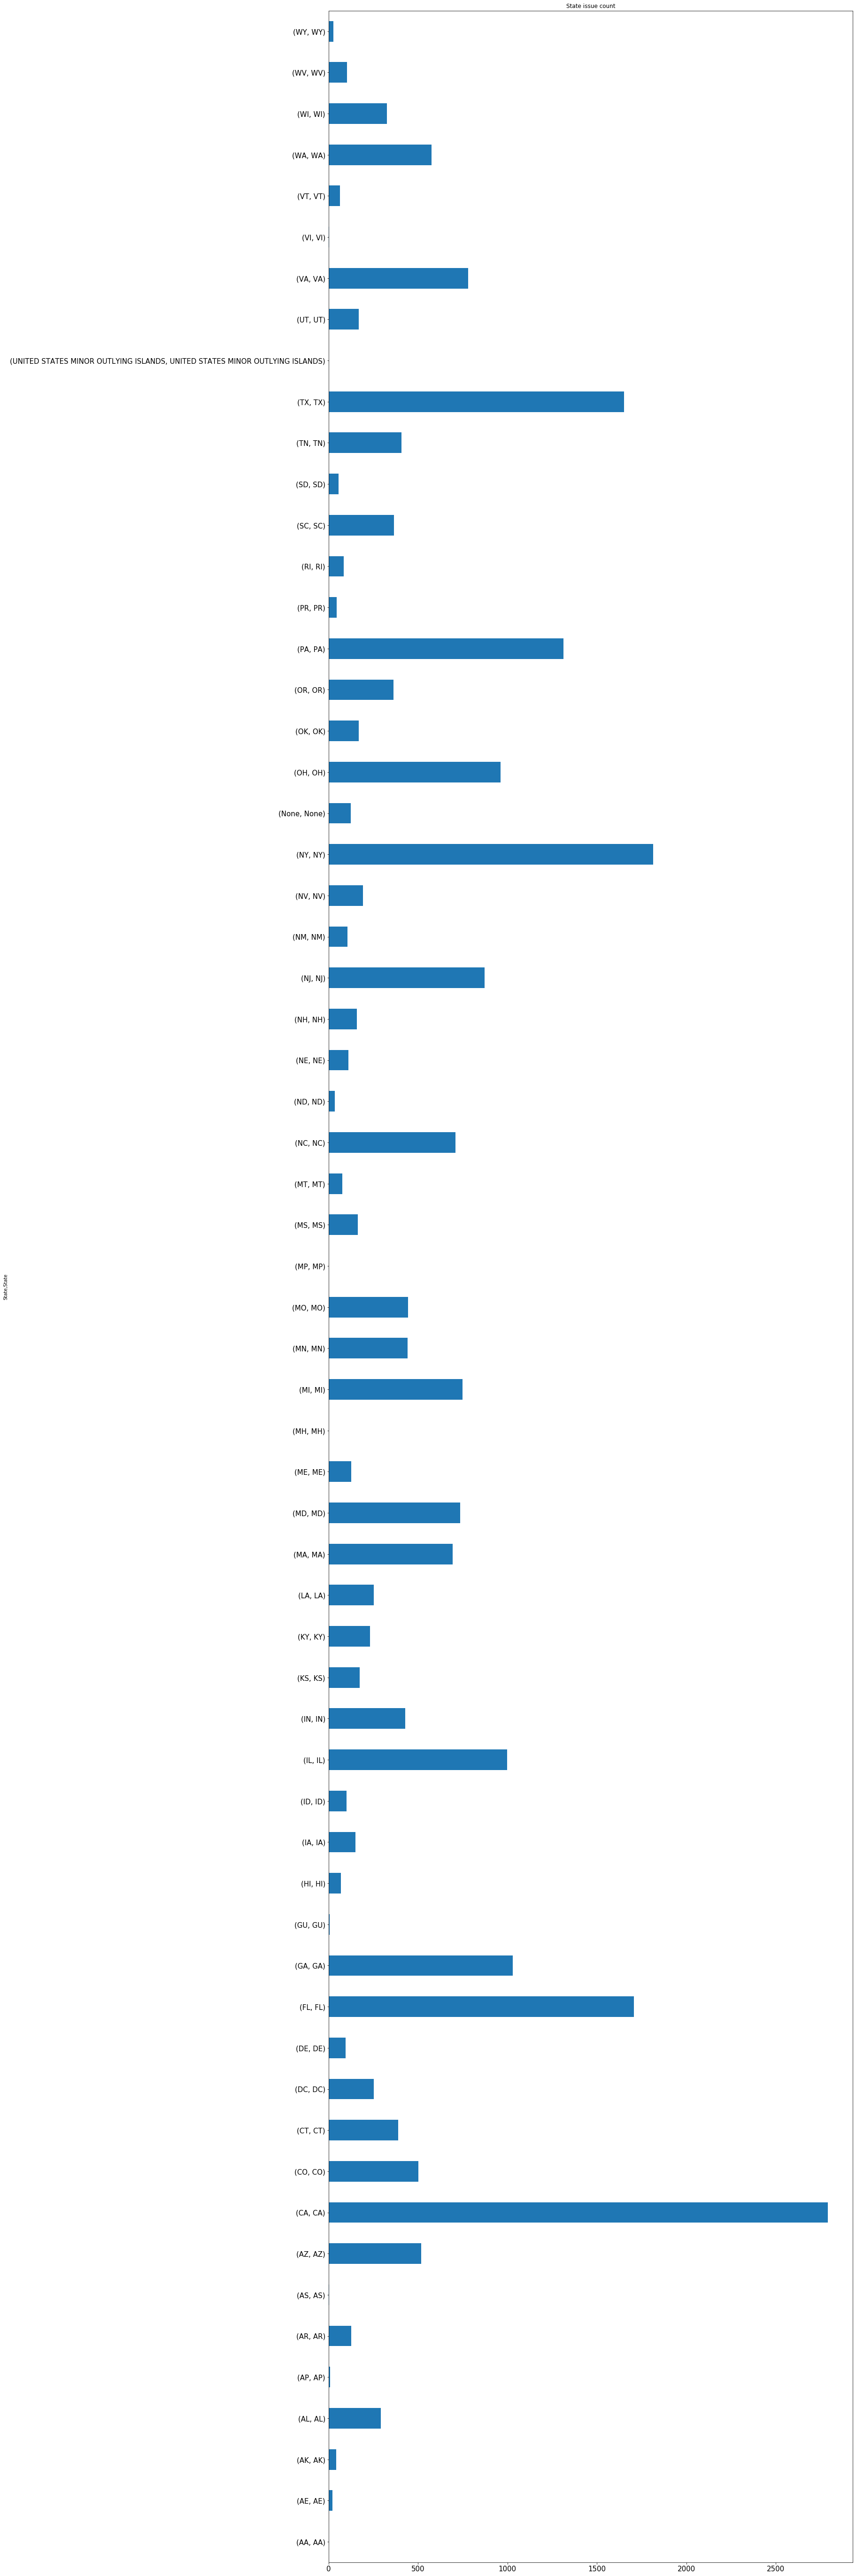

In [ ]:
state_data = data.groupby([data['State'], data['State']])['Company'].count()
state_data.plot(kind='barh',
               title="State issue count",
               fontsize=15,
               figsize=(20,100))

In [ ]:
zipcode_data = data.groupby([data['ZIP code'], data['State']])['Company'].count()
zipcode_data

ZIP code  State
00602     PR         1
00616     PR         1
00641     PR         1
00662     PR         2
00687     PR         1
                  ... 
None      VT        52
          WA       111
          WI       120
          WV        62
          WY        11
Name: Company, Length: 1907, dtype: int64

In [ ]:
data.count()

Date received                   25195
Product                         25195
Sub-product                     25195
Issue                           25195
Sub-issue                       25195
Consumer complaint narrative    25195
Company public response         25195
Company                         25195
State                           25195
ZIP code                        25195
Tags                            25195
Consumer consent provided?      25195
Submitted via                   25195
Date sent to company            25195
Company response to consumer    25195
Timely response?                25195
Consumer disputed?              11149
Complaint ID                    25195
date_week                       25195
date_month                      25195
date_year                       25195
dtype: int64

In [ ]:
data.drop_duplicates(subset='Consumer complaint narrative', keep='first')
data.count()

Date received                   25195
Product                         25195
Sub-product                     25195
Issue                           25195
Sub-issue                       25195
Consumer complaint narrative    25195
Company public response         25195
Company                         25195
State                           25195
ZIP code                        25195
Tags                            25195
Consumer consent provided?      25195
Submitted via                   25195
Date sent to company            25195
Company response to consumer    25195
Timely response?                25195
Consumer disputed?              11149
Complaint ID                    25195
date_week                       25195
date_month                      25195
date_year                       25195
dtype: int64

In [ ]:
print(non_federal_student_loan_data.count())
print(private_student_loan.count())

Date received                   5753
Product                         5753
Sub-product                     5753
Issue                           5753
Sub-issue                       5753
Consumer complaint narrative    5753
Company public response         5753
Company                         5753
State                           5753
ZIP code                        5753
Tags                            5753
Consumer consent provided?      5753
Submitted via                   5753
Date sent to company            5753
Company response to consumer    5753
Timely response?                5753
Consumer disputed?              5753
Complaint ID                    5753
date_week                       5753
date_month                      5753
date_year                       5753
dtype: int64
Date received                   4987
Product                         4987
Sub-product                     4987
Issue                           4987
Sub-issue                       4987
Consumer complaint narrat

In [ ]:
frames = [private_student_loan, non_federal_student_loan_data]
private_student_loan_data = pd.concat(frames)

print(private_student_loan_data.count())
print(federal_student_loan_data.count())

Date received                   10740
Product                         10740
Sub-product                     10740
Issue                           10740
Sub-issue                       10740
Consumer complaint narrative    10740
Company public response         10740
Company                         10740
State                           10740
ZIP code                        10740
Tags                            10740
Consumer consent provided?      10740
Submitted via                   10740
Date sent to company            10740
Company response to consumer    10740
Timely response?                10740
Consumer disputed?               5753
Complaint ID                    10740
date_week                       10740
date_month                      10740
date_year                       10740
dtype: int64
Date received                   14455
Product                         14455
Sub-product                     14455
Issue                           14455
Sub-issue                       14455

In [ ]:
private_student_loan_data.drop_duplicates(keep='first')
private_student_loan_data.drop_duplicates(subset='Consumer complaint narrative', keep='first')
private_student_loan_data.count()

Date received                   10740
Product                         10740
Sub-product                     10740
Issue                           10740
Sub-issue                       10740
Consumer complaint narrative    10740
Company public response         10740
Company                         10740
State                           10740
ZIP code                        10740
Tags                            10740
Consumer consent provided?      10740
Submitted via                   10740
Date sent to company            10740
Company response to consumer    10740
Timely response?                10740
Consumer disputed?               5753
Complaint ID                    10740
date_week                       10740
date_month                      10740
date_year                       10740
dtype: int64

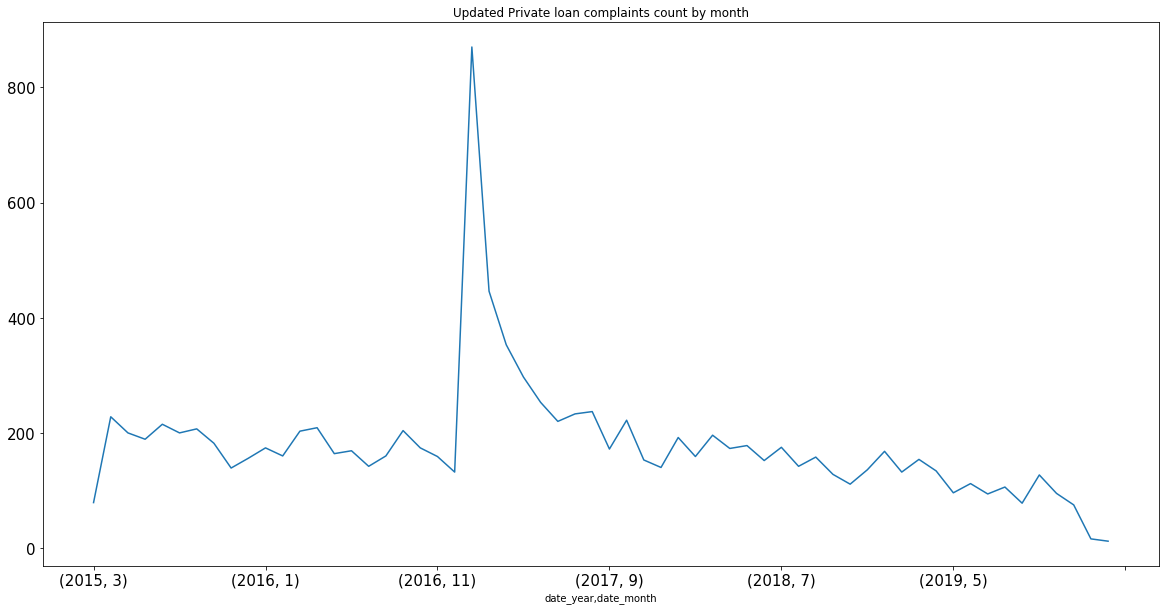

In [ ]:
calendar_private_student_loan_data = private_student_loan_data

calendar_private_student_loan_data['Date sent to company'] = pd.to_datetime(calendar_private_student_loan_data['Date sent to company'])
calendar_private_student_loan_data['date_week'] = calendar_private_student_loan_data['Date sent to company'].apply(lambda x: x.isocalendar()[1])
calendar_private_student_loan_data['date_month'] = pd.DatetimeIndex(calendar_private_student_loan_data['Date sent to company']).month
calendar_private_student_loan_data['date_year'] = pd.DatetimeIndex(calendar_private_student_loan_data['Date sent to company']).year

month_private_student_loan_data = calendar_private_student_loan_data.groupby([calendar_private_student_loan_data['date_year'], calendar_private_student_loan_data['date_month']])['Company'].count()
month_private_student_loan_data.plot(kind='line', figsize=(20,10), title='Updated Private loan complaints count by month', fontsize=15)


In [ ]:
zipcode_data = data[['ZIP code','Company']].groupby(['ZIP code'])['Company'].size().reset_index(name='count')
zipcode_data = zipcode_data.sort_values(by='count', ascending=False)
zipcode_data.to_excel("zipcode_complaints_count.xlsx")
print(zipcode_data)

     ZIP code  count
1828     None   6748
1139    606XX    291
582     300XX    265
1544    900XX    249
233     112XX    240
...       ...    ...
750     34755      1
749     34749      1
748     34747      1
746     34660      1
914     45640      1

[1829 rows x 2 columns]


In [ ]:
# navient_company_complaints.to_csv("Navient_complaints_data.csv")

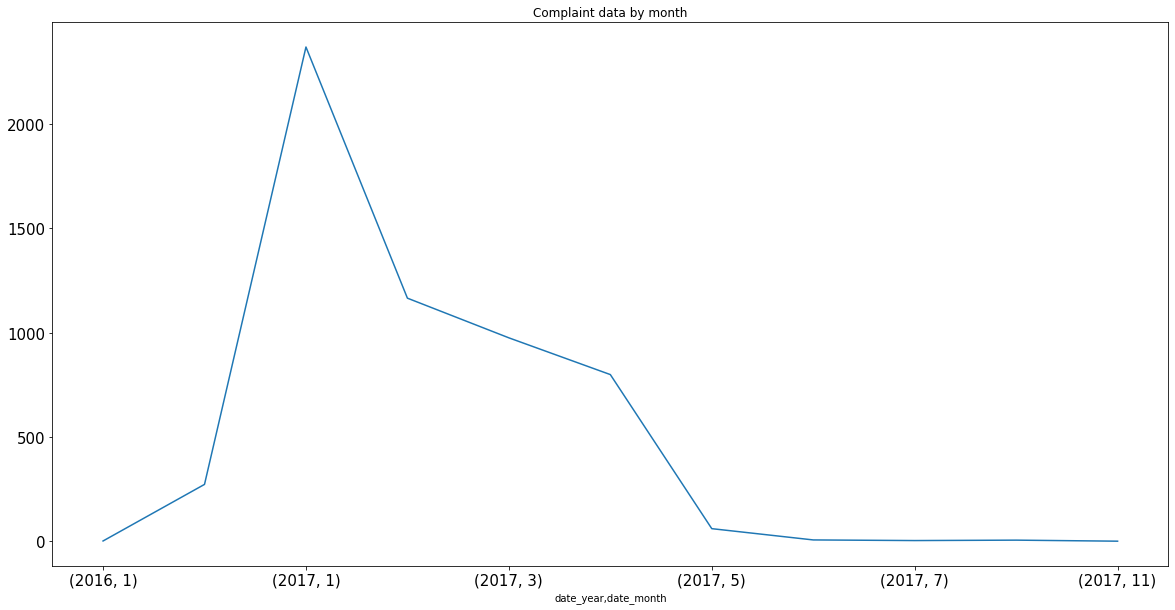

In [ ]:
start_date = '12-01-2016'
end_date = '05-01-2017'
data['Date received'] = pd.to_datetime(data['Date received'])
mask = (data['Date received'] >= start_date) & (data['Date received'] <= end_date)
peak_data = data.loc[mask]

calendar_peak_data = peak_data.groupby([peak_data['date_year'], peak_data['date_month']])['Company'].count()
calendar_peak_data.plot(kind='line', figsize=(20,10), title='Complaint data by month', fontsize=15)

peak_data_by_company = pd.DataFrame(columns=['Company','12','1','2','3','4','5'])

peak_data_by_company['Company'] = peak_data['Company'].unique()
peak_data_by_company.fillna(0, inplace=True)

for i, j in peak_data.iterrows():
    month = j['date_month']
    if month in peak_data_by_company.columns:
        Company = j['Company']
        peak_data_by_company.loc[peak_data_by_company['Company']==Company, str(month)] += 1
        
print(peak_data_by_company)